# Introducing Pandas

At the very basic level, Pandas objects can be thought of as enhanced versions of NumPy structured arrays in which the rows and columns are identified with labels rather than simple integer indices.
As we will see during the course of this chapter, Pandas provides a host of useful tools, methods, and functionality on top of the basic data structures, but nearly everything that follows will require an understanding of what these structures are.
Thus, before going any further, let's introduce these three fundamental Pandas data structures: the ``Series``, ``DataFrame``, and ``Index``.

Let's start our code sessions with the standard NumPy and Pandas imports:

In [2]:
import numpy as np
import pandas as pd

## The Pandas Series Object

A Pandas ``Series`` is a one-dimensional array of indexed data.
It can be created from a list or array as follows:

In [3]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

As we see in the output, the ``Series`` wraps both a sequence of values and a sequence of indices, which we can access with the ``values`` and ``index`` attributes.
The ``values`` are simply a familiar NumPy array:

In [3]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

The ``index`` is an array-like object of type ``pd.Index``, which we'll discuss in more detail momentarily.

In [4]:
data.index

RangeIndex(start=0, stop=4, step=1)

Like with a NumPy array, data can be accessed by the associated index via the familiar Python square-bracket notation:

In [5]:
data[1]

0.5

In [6]:
data[1:3]

1    0.50
2    0.75
dtype: float64

As will be shown next, though, the Pandas `Series` is much more general and flexible than the one-dimensional NumPy array that it emulates.

### `Series` as generalized NumPy array

From what have been shown so far, it may look like the `Series` object is basically interchangeable with a one-dimensional NumPy array.

The essential difference is the presence of the index: while the Numpy Array has an **implicitly defined** integer index used to access the values, the Pandas ``Series`` has an **explicitly defined** index associated with the values.

This explicit index definition gives the `Series` object additional capabilities. For example, the index doesn't need not be an integer, but can consist of values of any desired type.

For example, if we wish, we can use strings as an index:

In [4]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

And the item access works as expected:

In [5]:
data['b']

0.5

Non-contiguous or non-sequential indices can be used too:

In [0]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[2, 5, 3, 7])
data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

In [0]:
data[5]

0.5

### Series as specialized dictionary

In this way, you can think of a Pandas ``Series`` a bit like a specialization of a Python dictionary.
A dictionary is a structure that maps arbitrary keys to a set of arbitrary values, and a ``Series`` is a structure which maps typed keys to a set of typed values.
This typing is important: just as the type-specific compiled code behind a NumPy array makes it more efficient than a Python list for certain operations, the type information of a Pandas ``Series`` makes it much more efficient than Python dictionaries for certain operations.

The ``Series``-as-dictionary analogy can be made even more clear by constructing a ``Series`` object directly from a Python dictionary:

In [6]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

By default, a ``Series`` will be created where the index is drawn from the sorted keys.
From here, typical dictionary-style item access can be performed:

In [7]:
population['California']

38332521

Unlike a dictionary, though, the ``Series`` also supports array-style operations such as slicing:

In [12]:
population['California':'Illinois']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

### Constructing Series objects

Few ways of constructing a Pandas `Series` from scratch have been shown already; all of them are some version of the following:

```python
>>> pd.Series(data, index=index)
```

where ``index`` is an optional argument, and ``data`` can be one of many entities.

For example, ``data`` can be a list or NumPy array, in which case ``index`` defaults to an integer sequence:

In [13]:
pd.Series([2, 4, 6])

0    2
1    4
2    6
dtype: int64

``data`` can be a scalar, which is repeated to fill the specified index:

In [14]:
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

``data`` can be a dictionary, in which ``index`` defaults to the sorted dictionary keys:

In [15]:
pd.Series({2:'a', 1:'b', 3:'c'})

2    a
1    b
3    c
dtype: object

In each case, the index can be explicitly set if a different result is preferred:

In [16]:
pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2])

3    c
2    a
dtype: object

Notice that in this case, the ``Series`` is populated only with the explicitly identified keys.

## The Pandas DataFrame Object

There is another fundamental structure in Pandas is the `DataFrame`.

Like the `Series` object discussed in the previous section, the `DataFrame` can be thought of either as a generalization of a NumPy array, or as a specialization of a Python dictionary.

Let's now take a look at each of these perspectives.

### DataFrame as a generalized NumPy array
If a ``Series`` is an analog of a one-dimensional array with flexible indices, a ``DataFrame`` is an analog of a two-dimensional array with both flexible row indices and flexible column names.
Just as you might think of a two-dimensional array as an ordered sequence of aligned one-dimensional columns, you can think of a ``DataFrame`` as a sequence of aligned ``Series`` objects.
Here, by "aligned" we mean that they share the same index.

To demonstrate this, let's first construct a new ``Series`` listing the area of each of the five states discussed in the previous section:

In [17]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

Now that let's have this along with the ``population`` Series from before, we can use a dictionary to construct a single two-dimensional object containing this information:

In [18]:
states = pd.DataFrame({'population': population,
                       'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


Like the ``Series`` object, the ``DataFrame`` has an ``index`` attribute that gives access to the index labels:

In [19]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

Additionally, the ``DataFrame`` has a ``columns`` attribute, which is an ``Index`` object holding the column labels:

In [20]:
states.columns

Index(['population', 'area'], dtype='object')

Thus the ``DataFrame`` can be thought of as a generalization of a two-dimensional NumPy array, where both the rows and columns have a generalized index for accessing the data.

### DataFrame as specialized dictionary

Similarly, we can also think of a ``DataFrame`` as a specialization of a dictionary.
Where a dictionary maps a key to a value, a ``DataFrame`` maps a column name to a ``Series`` of column data.
For example, asking for the ``'area'`` attribute returns the ``Series`` object containing the areas we saw earlier:

In [21]:
states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

Notice the potential point of confusion here: in a two-dimesnional NumPy array, `data[0]` will return the first *row*. For a `DataFrame`, `data['col0']` will return the first *column*.
Because of this, it is probably better to think about `DataFrame`s as generalized dictionaries rather than generalized arrays, though both ways of looking at the situation can be useful.

### Constructing DataFrame objects

A Pandas `DataFrame` can be constructed in a variety of ways.
Here we'll give several examples.

#### From a single Series object

A `DataFrame` is a collection of `Series` objects, and a single-column `DataFrame` can be constructed from a single `Series`:

In [23]:
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


#### From a list of dicts

Any list of dictionaries can be made into a ``DataFrame``.
We'll use a simple list comprehension to create some data:

In [24]:
data = [{'a': i, 'b': 2 * i}
        for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


Even if some keys in the dictionary are missing, Pandas will fill them in with `NaN` (i.e., "not a number") values:

In [0]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


#### From a dictionary of Series objects

As we saw before, a ``DataFrame`` can be constructed from a dictionary of ``Series`` objects as well:

In [0]:
pd.DataFrame({'population': population,
              'area': area})

,area,population
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


#### From a two-dimensional NumPy array

Given a two-dimensional array of data, we can create a ``DataFrame`` with any specified column and index names.
If omitted, an integer index will be used for each:

In [0]:
pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

,foo,bar
a,0.865257,0.213169
b,0.442759,0.108267
c,0.047110,0.905718


## The Pandas Index Object

Si far has been covered here that both the `Series` and `DataFrame` objects contain an explicit **index** that lets you reference and modify data.

This `Index` object is an interesting structure in itself, and it can be thought of either as an **immutable array** or as an **ordered set** (technically a multi-set, as `Index` objects may contain repeated values).
Those views have some interesting consequences in the operations available on `Index` objects.
As a simple example, let's construct an ``Index`` from a list of integers:

In [25]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

### Index as immutable array

The `Index` in many ways operates like an array.
For example, we can use standard Python subscripting notation to retrieve values or slices:

In [26]:
ind[1]

3

In [27]:
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

`Index` objects also have many of the attributes familiar from NumPy arrays:

In [28]:
(ind.size, ind.shape, ind.ndim, ind.dtype)

(5, (5,), 1, dtype('int64'))

One difference between `Index` objects and NumPy arrays is that indices are immutable

In [0]:
ind[1] = 0

TypeError: Index does not support mutable operations

This immutability makes it safer to share indices between multiple ``DataFrame``s and arrays, without the potential for side effects from inadvertent index modification.

### Index as ordered set

Pandas objects are designed to facilitate operations such as joins across datasets, which depend on many aspects of set arithmetic.
The `Index` object follows many of the conventions used by Python's built-in `set` data structure, so that unions, intersections, differences, and other combinations can be computed in a familiar way:

In [31]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

In [33]:
indA.intersection(indB)

Int64Index([3, 5, 7], dtype='int64')

In [35]:
indA.union(indB)

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [37]:
indA.symmetric_difference(indB)

Int64Index([1, 2, 9, 11], dtype='int64')

## More on DataFrames

DataFrames, and actually pandas as a whole, is the pythonic reaction to the R language. `DataFrames` replicates the functionalities of R data.frames tables.

Here we will use Pandas `date_range()` method to create a DataFrame. The `date_range()` method will provide some timestamps that will be our indexes or rows. Let's will create 6 of them.

In [54]:
dates = pd.date_range('3/12/2021', periods=6)
dates

DatetimeIndex(['2021-03-12', '2021-03-13', '2021-03-14', '2021-03-15',
               '2021-03-16', '2021-03-17'],
              dtype='datetime64[ns]', freq='D')

Then let's create some fake data using numpy `random.randn` method, providing an array equal to the number of indexes/rows (in this case 6) and the number of columns, which we will keep at 5 characters from A to E.

Then we pass the fake data to the pandas `DataFrame`, together with the indexes and columns.

In [40]:
df = pd.DataFrame(np.random.randn(6, 5), index=dates, columns=list('ABCDE'))
df

,A,B,C,D,E
2021-03-12,0.256034,0.375673,-0.841963,-1.762025,-0.348420
2021-03-13,-0.415703,1.570640,1.686905,0.510009,-0.293372
2021-03-14,0.667339,-1.022721,-1.503480,0.298739,0.772658
2021-03-15,-0.480690,0.906160,-1.915272,-0.537900,-0.289124
2021-03-16,-0.708849,-1.319875,0.323782,-0.115836,0.388987
2021-03-17,1.244093,1.048995,0.086392,1.494519,-0.311253


### Viewing the components of a DataFrame 

To quickly view the top rows of our dataset, we can use the `head()` method, which will display few lines at the top of our DataFrame. We can select the number of rows to be printed, within the method `head(n)`

In [42]:
df.head(3)

,A,B,C,D,E
2021-03-12,0.256034,0.375673,-0.841963,-1.762025,-0.348420
2021-03-13,-0.415703,1.570640,1.686905,0.510009,-0.293372
2021-03-14,0.667339,-1.022721,-1.503480,0.298739,0.772658


To display the last rows of the DataFrame, use the method `tail()`. Like with head, we can specify the number of rows to be printed:

In [43]:
df.tail(2)

,A,B,C,D,E
2021-03-16,-0.708849,-1.319875,0.323782,-0.115836,0.388987
2021-03-17,1.244093,1.048995,0.086392,1.494519,-0.311253


### Quick summaries and transformations of the DataFrame

Pandas allows for very quick `DataFrame` summaries and transformations to aid in ETL (Extract Transform Load) and exploratory tasks.

For instance, if we want to transpose the DataFrame (changing the rows by the columns), we can use the following method, as we would do with a NumPy array:

In [45]:
df.T

,2021-03-12,2021-03-13,2021-03-14,2021-03-15,2021-03-16,2021-03-17
A,0.256034,-0.415703,0.667339,-0.480690,-0.708849,1.244093
B,0.375673,1.570640,-1.022721,0.906160,-1.319875,1.048995
C,-0.841963,1.686905,-1.503480,-1.915272,0.323782,0.086392
D,-1.762025,0.510009,0.298739,-0.537900,-0.115836,1.494519
E,-0.348420,-0.293372,0.772658,-0.289124,0.388987,-0.311253


A `DataFrame` can be represented as a NumPy array:

In [46]:
df.to_numpy()

array([[ 0.25603417,  0.37567341, -0.84196305, -1.7620247 , -0.34841977],
       [-0.41570335,  1.57063961,  1.6869046 ,  0.51000892, -0.29337213],
       [ 0.6673394 , -1.02272055, -1.50348009,  0.29873919,  0.77265804],
       [-0.4806898 ,  0.90616016, -1.91527176, -0.5379003 , -0.28912425],
       [-0.7088494 , -1.31987479,  0.32378246, -0.11583571,  0.38898666],
       [ 1.24409252,  1.04899465,  0.08639182,  1.49451857, -0.3112527 ]])

### Quick descriptive statistics

One of the most powerful methods for data analytics prototyping is the pandas `describe()` method. This method generates descriptive statistics that summarizes the central tendency, dispersion and shape of a dataset distribution, excluding `NaN` values.

The `describe()` method returns various descriptive statistics for the `Series` or `DataFrame`. And the [percentiles](https://en.wikipedia.org/wiki/Percentile) as well; by default, the lower is set to 25%, the upper to 75%, being the 50% percentile the same as the median.

In [47]:
df.describe()

,A,B,C,D,E
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,0.093704,0.259812,-0.360606,-0.018749,-0.013421
std,0.763193,1.175803,1.327806,1.094378,0.476480
min,-0.708849,-1.319875,-1.915272,-1.762025,-0.348420
25%,-0.464443,-0.673122,-1.338101,-0.432384,-0.306783
50%,-0.079835,0.640917,-0.377786,0.091452,-0.291248
75%,0.564513,1.013286,0.264435,0.457191,0.219459
max,1.244093,1.570640,1.686905,1.494519,0.772658


The default percentiles are the following: `[.25, .5, .75]`. We can modify the percentiles if we see fit by passing a list of the percentiles that we want to have, it always needs to be between 0 and 1:

In [48]:
df.describe(percentiles=[.10, .5, .90])

,A,B,C,D,E
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,0.093704,0.259812,-0.360606,-0.018749,-0.013421
std,0.763193,1.175803,1.327806,1.094378,0.476480
min,-0.708849,-1.319875,-1.915272,-1.762025,-0.348420
10%,-0.594770,-1.171298,-1.709376,-1.149963,-0.329836
50%,-0.079835,0.640917,-0.377786,0.091452,-0.291248
90%,0.955716,1.309817,1.005344,1.002264,0.580822
max,1.244093,1.570640,1.686905,1.494519,0.772658


### Sorting techniques

DataFrames can be sorted along certain axis using the `sort_index()` method. The `axis=0` corresponds to row sorting, and the `axis=1` corresponds to columns sorting.

In [52]:
df

,A,B,C,D,E
2021-03-12,0.256034,0.375673,-0.841963,-1.762025,-0.348420
2021-03-13,-0.415703,1.570640,1.686905,0.510009,-0.293372
2021-03-14,0.667339,-1.022721,-1.503480,0.298739,0.772658
2021-03-15,-0.480690,0.906160,-1.915272,-0.537900,-0.289124
2021-03-16,-0.708849,-1.319875,0.323782,-0.115836,0.388987
2021-03-17,1.244093,1.048995,0.086392,1.494519,-0.311253


In [51]:
df.sort_index(axis=0, ascending=False)

,A,B,C,D,E
2021-03-17,1.244093,1.048995,0.086392,1.494519,-0.311253
2021-03-16,-0.708849,-1.319875,0.323782,-0.115836,0.388987
2021-03-15,-0.480690,0.906160,-1.915272,-0.537900,-0.289124
2021-03-14,0.667339,-1.022721,-1.503480,0.298739,0.772658
2021-03-13,-0.415703,1.570640,1.686905,0.510009,-0.293372
2021-03-12,0.256034,0.375673,-0.841963,-1.762025,-0.348420


In [53]:
df.sort_index(axis=1, ascending=False)

,E,D,C,B,A
2021-03-12,-0.348420,-1.762025,-0.841963,0.375673,0.256034
2021-03-13,-0.293372,0.510009,1.686905,1.570640,-0.415703
2021-03-14,0.772658,0.298739,-1.503480,-1.022721,0.667339
2021-03-15,-0.289124,-0.537900,-1.915272,0.906160,-0.480690
2021-03-16,0.388987,-0.115836,0.323782,-1.319875,-0.708849
2021-03-17,-0.311253,1.494519,0.086392,1.048995,1.244093


## Plotting

Let's use `matplotlib` library to see some examples on how to visualize the data in a DataFrame:

<Axes: >

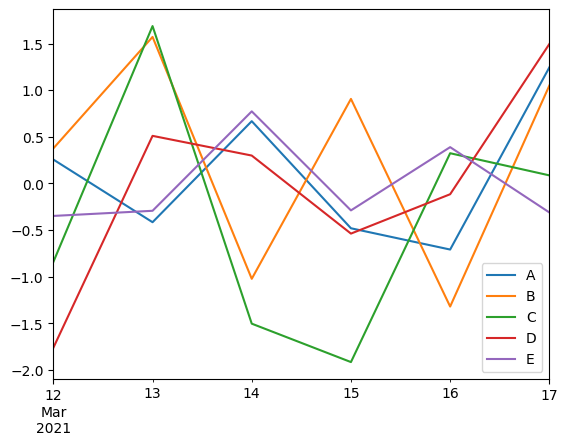

In [72]:
df.plot()

<Axes: >

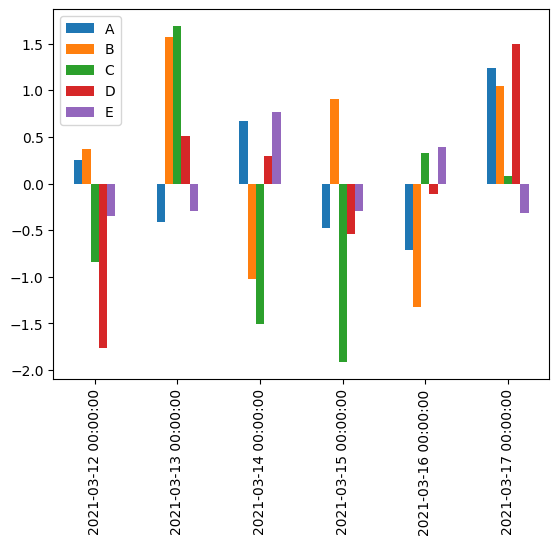

In [73]:
df.plot.bar()

<Axes: >

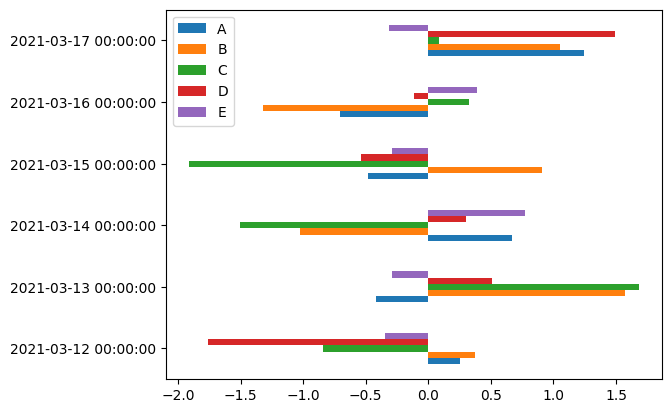

In [74]:
df.plot.barh()

[Text(0, 0, '0.256034'),
 Text(0, 0, '-0.415703'),
 Text(0, 0, '0.667339'),
 Text(0, 0, '-0.48069'),
 Text(0, 0, '-0.708849'),
 Text(0, 0, '1.24409')]

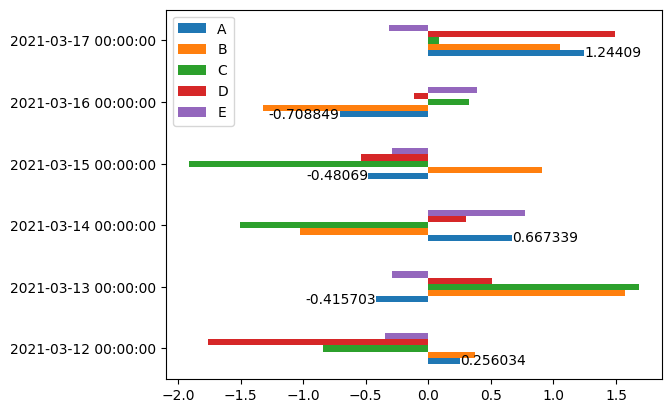

In [85]:
ax = df.plot.barh()
ax.bar_label(ax.containers[0])

### Getting data In and Out

It is very convenient to work with the data in Excel when the size allows for it. Excel documents if ofthen the start of data analysis. Exporting data from Excel format to CSV is easy and recommended to bring into Pandas for more analysis power.

DataFrames can also be exported to CSV and then inported into Excel. 

In [88]:
df.to_csv('random_data_with_dates.csv')

In [89]:
pd.read_csv('group_data_with_dates.csv')

,Unnamed: 0,Group 1,Group 2,Group 3,Group 4,Group 4.1
0,2021-03-12,0.256034,0.375673,-0.841963,-1.762025,-0.348420
1,2021-03-13,-0.415703,1.570640,1.686905,0.510009,-0.293372
2,2021-03-14,0.667339,-1.022721,-1.503480,0.298739,0.772658
3,2021-03-15,-0.480690,0.906160,-1.915272,-0.537900,-0.289124
4,2021-03-16,-0.708849,-1.319875,0.323782,-0.115836,0.388987
5,2021-03-17,1.244093,1.048995,0.086392,1.494519,-0.311253
6,NaN,NaN,NaN,NaN,NaN,NaN


CSV can be read directly from API or URL. Let's use JetBrains 2017 Python survey to do some data analysis:

In [60]:
data = pd.read_csv("https://github.com/vfp1/bts-mbds-data-science-foundations-2019/raw/master/sessions/data/pythondevsurvey2017_raw_data.csv")
data.head()

,Is Python the main language you use for your current projects?,None:What other language(s) do you use?,Java:What other language(s) do you use?,JavaScript:What other language(s) do you use?,C/C++:What other language(s) do you use?,PHP:What other language(s) do you use?,C#:What other language(s) do you use?,Ruby:What other language(s) do you use?,Bash / Shell:What other language(s) do you use?,Objective-C:What other language(s) do you use?,...,Technical support:Which of the following best describes your job role(s)?,Data analyst:Which of the following best describes your job role(s)?,Business analyst:Which of the following best describes your job role(s)?,Team lead:Which of the following best describes your job role(s)?,Product manager:Which of the following best describes your job role(s)?,CIO / CEO / CTO:Which of the following best describes your job role(s)?,Systems analyst:Which of the following best describes your job role(s)?,Other - Write In::Which of the following best describes your job role(s)?,Could you tell us your age range?,What country do you live in?
0,Yes,NaN,NaN,JavaScript,NaN,PHP,NaN,NaN,Bash / Shell,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60 or older,Italy
1,Yes,NaN,NaN,JavaScript,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Team lead,NaN,NaN,NaN,NaN,40-49,United Kingdom
2,Yes,NaN,NaN,JavaScript,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40-49,France
3,"No, I don’t use Python for my current projects",NaN,NaN,NaN,NaN,NaN,C#,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17 or younger,Spain
4,Yes,NaN,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18-20,Israel


In [62]:
data.describe(include=['object'], exclude=np.number)

,Is Python the main language you use for your current projects?,None:What other language(s) do you use?,Java:What other language(s) do you use?,JavaScript:What other language(s) do you use?,C/C++:What other language(s) do you use?,PHP:What other language(s) do you use?,C#:What other language(s) do you use?,Ruby:What other language(s) do you use?,Bash / Shell:What other language(s) do you use?,Objective-C:What other language(s) do you use?,...,Technical support:Which of the following best describes your job role(s)?,Data analyst:Which of the following best describes your job role(s)?,Business analyst:Which of the following best describes your job role(s)?,Team lead:Which of the following best describes your job role(s)?,Product manager:Which of the following best describes your job role(s)?,CIO / CEO / CTO:Which of the following best describes your job role(s)?,Systems analyst:Which of the following best describes your job role(s)?,Other - Write In::Which of the following best describes your job role(s)?,Could you tell us your age range?,What country do you live in?
count,9506,805,2650,4460,3333,1470,1363,501,3075,196,...,831,1226,361,1142,423,458,680,590,9502,9502
unique,3,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,7,154
top,Yes,None,Java,JavaScript,C/C++,PHP,C#,Ruby,Bash / Shell,Objective-C,...,Technical support,Data analyst,Business analyst,Team lead,Product manager,CIO / CEO / CTO,Systems analyst,Other - Write In:,21-29,United States
freq,6417,805,2650,4460,3333,1470,1363,501,3075,196,...,831,1226,361,1142,423,458,680,590,3717,1638


Let's plot the answers to a single question: "What do you use Python for the most?"

In [63]:
counts = data["What do you use Python for the most?"].value_counts()
counts.sum()

8112

In [64]:
len(data)

9506

In [65]:
(counts/counts.sum()).head()

Web development                                                0.260355
Data analysis                                                  0.176282
Educational purposes                                           0.094058
DevOps / System administration / Writing automation scripts    0.092949
Machine learning                                               0.085799
Name: What do you use Python for the most?, dtype: float64

<Axes: >

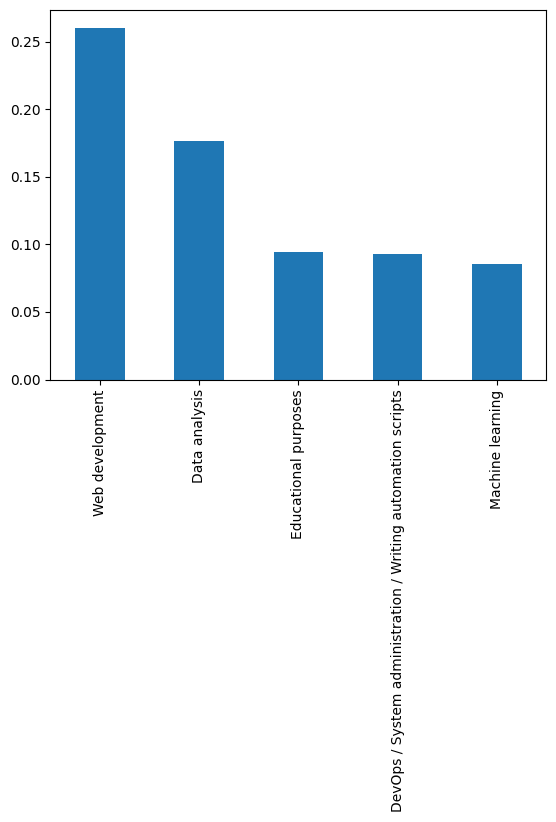

In [66]:
question = "What do you use Python for the most?"
data[question].value_counts(normalize=True).head().plot.bar()